In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
sns.set(font_scale=1.5)
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error 

def to_date(value):
    return datetime.strptime(value, "%Y-%m-%d")

def loadDS():

  data = pd.read_csv("C:\\Users\\Herlisson\\Documents\\Mecai - 2018\\2019_01 - Pratica de AM e MD\\all_stocks_5yr.csv")
  data.head()
  data.dtypes

  data['date'] = data['date'].apply(to_date)
  data.set_index(['date'], inplace = True)
  data.head()

  return data

def prepareUT(data):

  data['low']   = 1
  data['open']  = 2
  data['close'] = 3
  data['high']  = 4

def myPlot(data, asset):

  fig, ax = plt.subplots(figsize = (20,8))
  ax.plot_date(data.loc[data['Name'] == asset].index , data.loc[data['Name'] == asset, 'open'],  'b-', linewidth=2)
  ax.plot_date(data.loc[data['Name'] == asset].index , data.loc[data['Name'] == asset, 'close'], 'g-', linewidth=2)
  #--- improvement: shading instead of points - DONE, IS OK?
  #ax.plot_date(data.loc[data['Name'] == asset].index,  data.loc[data['Name'] == asset, 'low'],   'g--', alpha=0.5, markersize=8) #Alterado
  #ax.plot_date(data.loc[data['Name'] == asset].index,  data.loc[data['Name'] == asset, 'high'],  'b--', alpha=0.5, markersize=8) #Alterado
  ax.fill_between(data.loc[data['Name'] == asset].index , data.loc[data['Name'] == asset, 'low'], data.loc[data['Name'] == asset, 'high'], alpha = 0.5)

  ax.set_ylim(data.loc[data.loc[data['Name'] == asset].index >= datetime.strptime('2017-01-01', "%Y-%m-%d")].min()[0:4].min() -3 , 
              data.loc[data.loc[data['Name'] == asset].index >= datetime.strptime('2017-01-01', "%Y-%m-%d")].max()[0:4].max() +3 ) #Alterado
  
  ax.set_ylabel("US$", fontsize=15)
  ax.set_title("Cotação do ativo "+asset , fontsize=25)
  ax.xaxis.set_minor_locator(dates.MonthLocator())
  ax.xaxis.set_minor_formatter(dates.DateFormatter("%m"))
  ax.xaxis.set_major_locator(dates.YearLocator())
  ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
  ax.set_xlim(datetime.strptime('2017-01-01', "%Y-%m-%d") ,
              datetime.strptime('2018-02-01', "%Y-%m-%d"))

  ax.legend(fontsize=15)
  fig.autofmt_xdate()
  plt.show()

# loads S&P500 dataset and converts dates to typed structures
print('Loading and preprocessing the S&P500 dataset')
data = loadDS()
print('\n\nDataset loaded!')
#prepareUT(data)

Loading and preprocessing the S&P500 dataset


Dataset loaded!


Select an asset (ENTER to finish): AAL


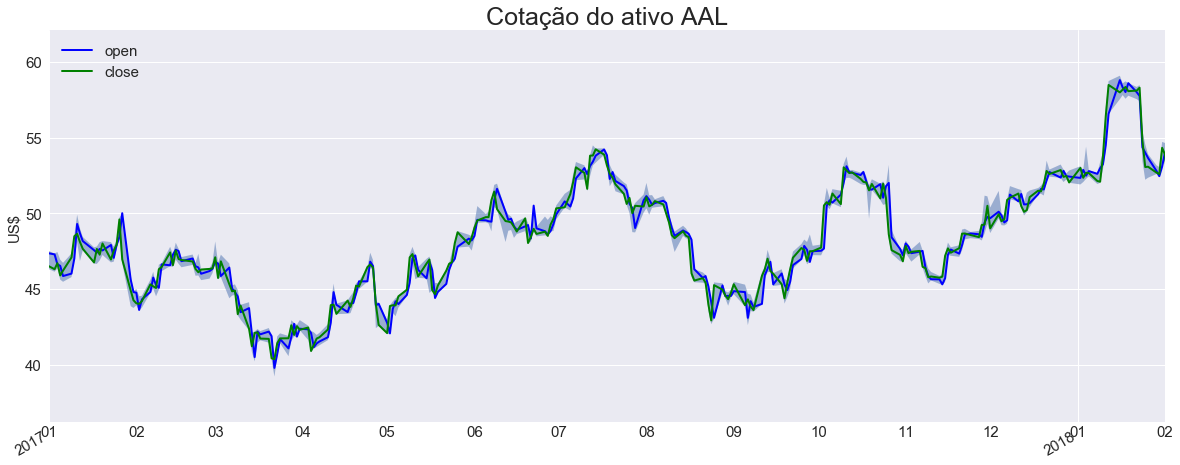

Asset		distance		close-open		high-low

AAL		Euclidiana		26.43		45.38

AAL		Manhattan		701.03		1422.61

AAL		cosine		 0.00		 0.00



In [ ]:
asset = input("Select an asset (ENTER to finish): ").upper()
while(len(asset) > 0):

  # plots the time series for the specified asset since Jan, closing values
  myPlot(data, asset)

  # computing similarity between pairs of time series

  distances = [('Euclidiana', sc.spatial.distance.euclidean),
               ('Manhattan',  sc.spatial.distance.cityblock),
               ('cosine',     sc.spatial.distance.cosine)]

  values = data.loc[ data['Name'] == asset,:]

  print('Asset\t\tdistance\t\tclose-open\t\thigh-low\n')
  for (distname, distf) in distances:	
    d1 = distf(values['open'], values['close'])
    d2 = distf(values['low'],  values['high'])
    print('{0}\t\t{1}\t\t{2:5.2f}\t\t{3:5.2f}\n'.format(asset, distname, d1, d2))

  asset = input("Select an asset (ENTER to finish): ").upper()

In [9]:
name = 'AAL'
data_prev = '2018-02-01'
passos = 1
intervalo = 30
serie = 'close'

#def media_movel(data, name, data_prev, passos=1,intervalo, serie):
indice = np.min( np.where( (data.index == data_prev) & (data.Name == name) ) )

if indice - intervalo < 0: #Very naive
  print('Insuficient data for the chosen interval !')

prev = data[ indice - intervalo : indice ]

for i in range(0,passos):
  media = prev[serie].iloc(axis=0)[0+i : intervalo + i].mean()
  idx = (to_date(data_prev) + timedelta(days= i)).strftime("%Y-%m-%d")
  prev = prev.append(pd.DataFrame({serie: media} , index = [idx] ))

#Measuring errors of prediction
pred = prev[serie].iloc[intervalo : intervalo + passos]
real = data[serie].iloc(axis=0)[indice:indice+passos]

mse = mean_squared_error(real , pred)
rmse = mse ** (1/2)

abserror = 100*(abs( (np.array(pred)-np.array(real) ) / np.array(pred) )).sum()
mape =(1/passos)*abserror


    #return prev, rmse, mape
print(prev)

if prev[serie].iloc[intervalo] - prev[serie].iloc[intervalo-1] >0:
    print("\nTendencia de subir!")
else:
    print("\nTendencia de cair! ")

#previsao, erro1, erro2 = mediamovel(data, 'AAL', '2018-02-01',1,20,'close')

                    Name      close     high      low   open      volume
2017-12-18 00:00:00  AAL  51.490000  51.6600  51.2500  51.25   3236066.0
2017-12-19 00:00:00  AAL  51.440000  51.8100  51.2800  51.60   3019807.0
2017-12-20 00:00:00  AAL  51.920000  52.1000  51.1700  51.57   5172839.0
2017-12-21 00:00:00  AAL  52.790000  53.4700  52.0700  52.16   7125891.0
2017-12-22 00:00:00  AAL  52.590000  52.8800  52.4200  52.72   2425104.0
2017-12-26 00:00:00  AAL  52.850000  53.2150  52.3300  52.35   2774316.0
2017-12-27 00:00:00  AAL  52.400000  52.8800  52.0600  52.80   2831434.0
2017-12-28 00:00:00  AAL  52.460000  52.6300  52.2200  52.45   1845331.0
2017-12-29 00:00:00  AAL  52.030000  52.8200  52.0100  52.42   2697096.0
2018-01-02 00:00:00  AAL  52.990000  53.1000  51.9000  52.33   4084712.0
2018-01-03 00:00:00  AAL  52.340000  52.8600  52.0550  52.86   5074850.0
2018-01-04 00:00:00  AAL  52.670000  54.4000  52.2650  52.48   3557059.0
2018-01-05 00:00:00  AAL  52.650000  52.8388  52.43

In [6]:
prev[serie].iloc[intervalo]

54.998499999999993